In [1]:
import os
import sys
import subprocess
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyranges as pr
# from wignado.tiledb import ConverterConfig, BigwigToTileDBConverter,TileDBQueryEngine,GenomicRegion
from wignado.zarrstore import ZarrConverterConfig, ZarrQueryEngine, BigWigToZarrConverter,GenomicRegion
import zarr

/opt/homebrew/Caskroom/miniforge/base/envs/wignado/lib/python3.12/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# cfg = ZarrConverterConfig(overwrite=True)
# converter = BigWigToZarrConverter(config=cfg, bigwig_path='/Users/asmith/Downloads/CAT-22620_H3K27ac.bigWig', zarr_path='test.zarr')
# converter.convert()

In [3]:
query_engine = ZarrQueryEngine(zarr_path='test.zarr')
tss = "/Users/asmith/Downloads/tss.bed"
tss_gr = pr.read_bed(tss)
tss_gr = tss_gr.sort()
regions = [GenomicRegion(chrom=row.Chromosome, start=row.Start-1000, end=row.End+1000) for idx, row in tss_gr.df.iterrows()]

In [ ]:
x = query_engine.query_multiple_regions_array(regions, 1000)

  0%|          | 0/77849 [00:00<?, ?it/s]

  8%|▊         | 6534/77849 [00:08<01:25, 837.96it/s]2025-08-24 22:37:21.530 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196472v1_fix' missing from Zarr store
2025-08-24 22:37:21.530 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196472v1_fix' missing from Zarr store
2025-08-24 22:37:21.530 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196472v1_fix' missing from Zarr store
2025-08-24 22:37:21.531 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196472v1_fix' missing from Zarr store
2025-08-24 22:37:21.531 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196472v1_fix' missing from Zarr store
2025-08-24 22:37:21.531 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196473v1_fix' missing from Zarr store
2025-08-24 22:37:21.531 | DEBUG    | wignado.zarrstore:_resolve:211 - Chromosome 'chr1_KN196473v1_fix' missing from Zarr store
2025-08-24 22:37:21.531 | DEBUG    | wignado.zarrstore:_re

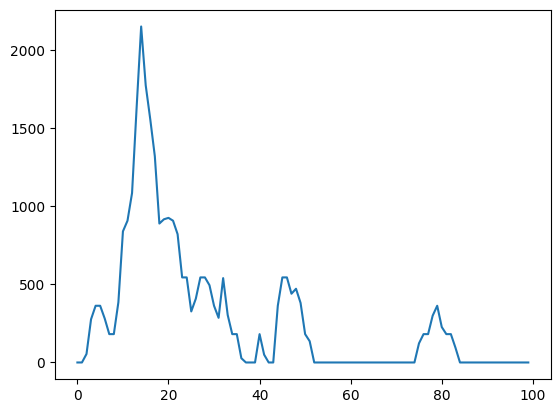

In [20]:
random = np.random.randint(0, x.shape[0], size=1)
plt.plot(np.arange(x.shape[1]), x[random].flatten())

In [ ]:
# cfg = ConverterConfig(
#     overwrite=True,
#     tile_size=10_000,
#     use_integer_contig_map=True,
# )

# converter = BigwigToTileDBConverter(config=cfg, bigwig_path='/Users/asmith/Downloads/CAT-22620_H3K27ac.bigWig', tiledb_path='test_engine_v2')
# converter.convert()

In [ ]:
query_engine = TileDBQueryEngine(tiledb_path='test_engine_v2')

In [ ]:
tss = "/Users/asmith/Downloads/tss.bed"

tss_df = pd.read_csv(tss, sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"]).sample(n=1000)
regions = [GenomicRegion(chrom=row.chrom, start=max(0, row.start - 1000), end=row.end + 1000) for idx, row in tss_df.iterrows()]

In [ ]:
tss_gr = pr.read_bed(tss)

In [ ]:
tss_gr = tss_gr.sort()

In [ ]:
import tiledb

with tiledb.open(str('test_engine_v2'), 'r') as arr:
    print(arr.schema)
    q = arr.query(cond='chromosome == 21')
    df = q.df[:]

ArraySchema(
  domain=Domain(*[
    Dim(name='chromosome', domain=(0, 449), tile=1, dtype='uint32', filters=FilterList([ZstdFilter(level=-1), ])),
    Dim(name='position', domain=(0, 248957422), tile=10000, dtype='uint64', filters=FilterList([ZstdFilter(level=-1), ])),
  ]),
  attrs=[
    Attr(name='value', dtype='float32', var=False, nullable=False, enum_label=None, filters=FilterList([BitShuffleFilter(), ByteShuffleFilter(), ZstdFilter(level=3), ChecksumMD5Filter(), ])),
  ],
  cell_order='row-major',
  tile_order='row-major',
  capacity=100000,
  sparse=True,
  allows_duplicates=False,
)



In [ ]:
x

In [ ]:
query_engine.query_multiple_regions_array(regions=regions, n_bins=100)

RuntimeError: Failed to add range via subarray fallback: 'Subarray' object has no attribute 'add_range'